In [1]:
#for plotting, numbers etc.
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#for splitting the data
from sklearn.model_selection import train_test_split
#keras functions
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.python.keras.utils import np_utils
from keras.utils import to_categorical, plot_model
# from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam, RMSprop
from keras.regularizers import l1, l2, l1_l2
#normalize the data
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV 

2024-05-11 19:42:30.175911: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-11 19:42:33.848392: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-11 19:42:33.860924: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-11 19:42:40.346013: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
# Load the data 
data = pd.read_csv("kale.csv")

data.head()

,labels,Concentration,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,3,above,68.12,69.22,72.12,70.15,72.46,71.73,70.18,72.05,...,3.72,3.44,2.51,1.89,2.24,1.97,2.16,1.94,1.89,3.98
1,3,above,70.98,70.62,72.72,68.77,70.51,72.24,73.58,74.09,...,5.15,5.46,5.19,4.08,5.04,4.93,4.69,4.61,4.76,5.45
2,3,above,71.58,70.36,75.43,70.96,71.73,72.42,72.71,72.78,...,5.44,5.61,4.72,3.59,4.31,4.74,4.95,4.51,4.37,4.34
3,3,above,70.41,69.84,73.77,70.19,70.64,72.30,72.61,73.33,...,5.93,5.77,5.28,3.93,4.67,4.73,5.48,4.62,3.98,4.49
4,3,above,70.65,70.17,76.08,70.42,72.28,73.59,74.04,74.45,...,4.37,4.06,3.76,2.46,3.66,3.54,4.08,3.31,2.64,3.92


In [17]:
data.values[:, 2:]

array([[68.12, 69.22, 72.12, ..., 1.94, 1.89, 3.98],
       [70.98, 70.62, 72.72, ..., 4.61, 4.76, 5.45],
       [71.58, 70.36, 75.43, ..., 4.51, 4.37, 4.34],
       ...,
       [93.47, 95.81, 94.31, ..., 12.61, 13.63, 13.03],
       [90.34, 92.15, 91.45, ..., 12.15, 12.69, 12.16],
       [95.4, 98.56, 94.56, ..., 14.15, 14.18, 14.32]], dtype=object)

In [19]:
# read the features (scans) and transform data from relfectance to absorbance
feat = np.log(1.0 / data.values[:, 2:].astype('float32'))  # Cast to float32 (optional)

feat.shape

(501, 512)

In [35]:
# 

# One-hot encode the labels 

labels_one = to_categorical(data['labels'])

labels_one.shape

(501, 4)

In [21]:
X = feat 
y = labels_one

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

print("Train X: ", len(train_X))
print("Test X: ",len(test_X))
print("Train y: ", len(train_y))
print("Test y: ", len(test_y))


Train X:  400
Test X:  101
Train y:  400
Test y:  101


Epoch 1/20
40/40 [==============================] - 4s 38ms/step - loss: 1.1436 - accuracy: 0.4700 - val_loss: 1.0632 - val_accuracy: 0.4851
Epoch 2/20
40/40 [==============================] - 2s 39ms/step - loss: 1.1195 - accuracy: 0.4700 - val_loss: 1.0532 - val_accuracy: 0.4851
Epoch 3/20
40/40 [==============================] - 2s 38ms/step - loss: 1.1025 - accuracy: 0.4850 - val_loss: 1.0396 - val_accuracy: 0.4851
Epoch 4/20
40/40 [==============================] - 1s 29ms/step - loss: 1.0959 - accuracy: 0.4900 - val_loss: 1.0348 - val_accuracy: 0.4851
Epoch 5/20
40/40 [==============================] - 1s 35ms/step - loss: 1.0812 - accuracy: 0.4925 - val_loss: 1.0877 - val_accuracy: 0.4851
Epoch 6/20
40/40 [==============================] - 1s 28ms/step - loss: 1.0784 - accuracy: 0.5050 - val_loss: 1.0616 - val_accuracy: 0.4851
Epoch 7/20
40/40 [==============================] - 2s 42ms/step - loss: 1.0757 - accuracy: 0.4800 - val_loss: 1.0465 - val_accuracy: 0.4851
Epoch 8/20
40

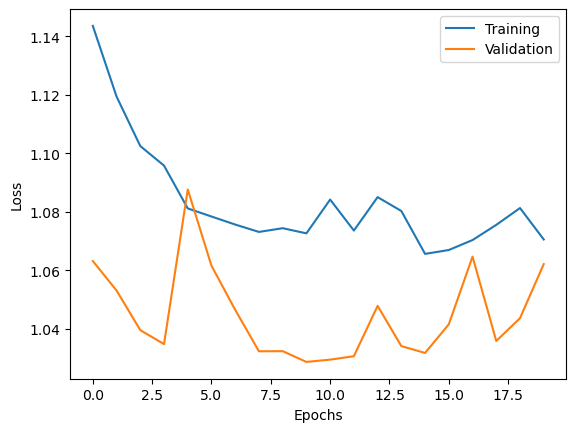

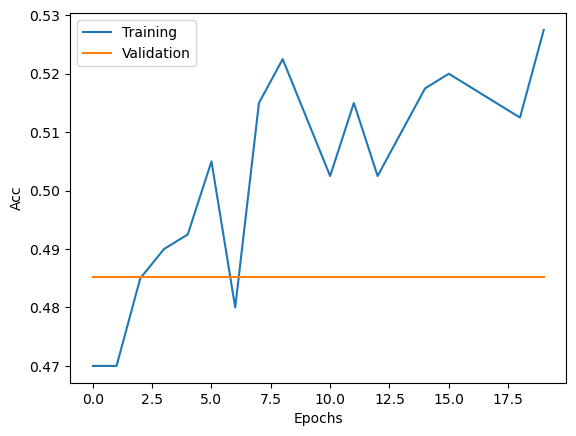

In [22]:
# Set up the 1D CNN 

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training','Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training','Validation'])
    plt.show()


model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(train_X.shape[1], 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=20, batch_size=10, 
                    validation_data=(test_X, test_y))
plot_history(history)

16/16 [==============================] - 0s 16ms/step


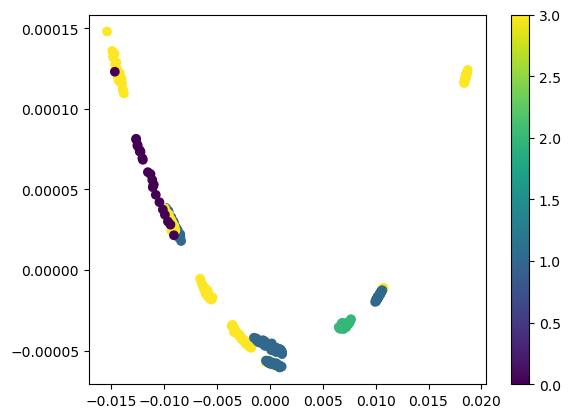

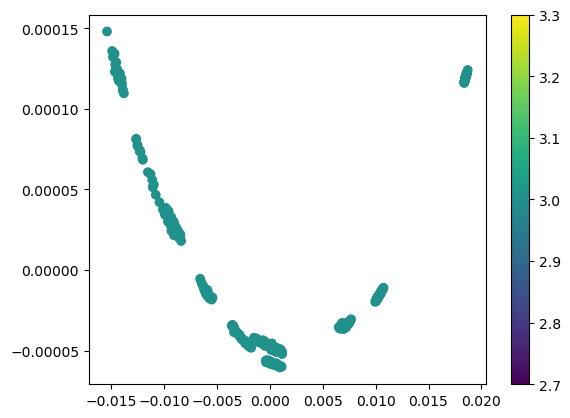

In [24]:
labels = data["labels"]
pred = model.predict(feat)
pred_class = []
for i in range(len(pred)):
    pred_class.append(np.argmax(pred[i]))
pca = PCA(n_components=2)
pts = pca.fit_transform(pred)
plt.scatter(pts[:,0], pts[:,1], c = labels)
plt.colorbar()
plt.show()

plt.scatter(pts[:,0], pts[:,1], c = pred_class)
plt.colorbar()
plt.show()

Epoch 1/20
40/40 [==============================] - 4s 75ms/step - loss: 1.1547 - accuracy: 0.4500 - val_loss: 1.0402 - val_accuracy: 0.4851
Epoch 2/20
40/40 [==============================] - 2s 45ms/step - loss: 1.1059 - accuracy: 0.4675 - val_loss: 1.0552 - val_accuracy: 0.4851
Epoch 3/20
40/40 [==============================] - 2s 54ms/step - loss: 1.1013 - accuracy: 0.5000 - val_loss: 1.0368 - val_accuracy: 0.4851
Epoch 4/20
40/40 [==============================] - 3s 66ms/step - loss: 1.1058 - accuracy: 0.5125 - val_loss: 1.0316 - val_accuracy: 0.4851
Epoch 5/20
40/40 [==============================] - 3s 63ms/step - loss: 1.0875 - accuracy: 0.5200 - val_loss: 1.0417 - val_accuracy: 0.4851
Epoch 6/20
40/40 [==============================] - 2s 59ms/step - loss: 1.0769 - accuracy: 0.5025 - val_loss: 1.0423 - val_accuracy: 0.4851
Epoch 7/20
40/40 [==============================] - 2s 62ms/step - loss: 1.0880 - accuracy: 0.5025 - val_loss: 1.0512 - val_accuracy: 0.4851
Epoch 8/20
40

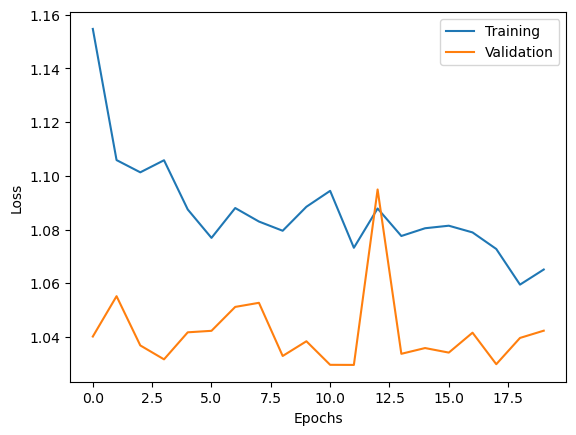

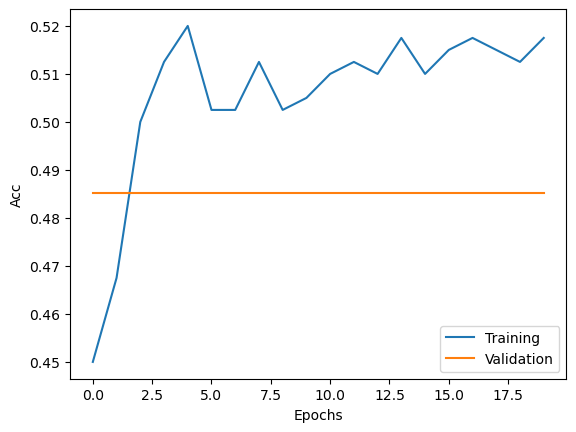

In [26]:
model = Sequential()
model.add(Conv1D(100, 3, activation='relu', input_shape=(train_X.shape[1], 1)))
model.add(Conv1D(100, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(100, 3, activation='relu'))
model.add(Conv1D(100, 3, activation='relu'))
# model.add(MaxPooling1D(3))
# model.add(Flatten())
model.add(GlobalAveragePooling1D())
model.add(Dropout(.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=20, batch_size=10, validation_data=(test_X, test_y))

plot_history(history)

In [37]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define your CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(512, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_X, train_y, epochs=10, batch_size=32, validation_data=(test_X, test_y))

# Evaluate the model
loss, accuracy = model.evaluate(test_X, test_y)
print("Test Accuracy:", accuracy)


Epoch 1/10
13/13 [==============================] - 3s 107ms/step - loss: 1.4346 - accuracy: 0.4875 - val_loss: 1.2277 - val_accuracy: 0.4851
Epoch 2/10
13/13 [==============================] - 1s 79ms/step - loss: 1.1146 - accuracy: 0.5175 - val_loss: 1.0472 - val_accuracy: 0.4851
Epoch 3/10
13/13 [==============================] - 1s 80ms/step - loss: 1.0561 - accuracy: 0.5175 - val_loss: 1.0490 - val_accuracy: 0.4851
Epoch 4/10
13/13 [==============================] - 1s 97ms/step - loss: 1.0811 - accuracy: 0.5175 - val_loss: 1.0322 - val_accuracy: 0.4851
Epoch 5/10
13/13 [==============================] - 1s 78ms/step - loss: 1.0669 - accuracy: 0.5175 - val_loss: 1.0487 - val_accuracy: 0.4851
Epoch 6/10
13/13 [==============================] - 2s 121ms/step - loss: 1.0656 - accuracy: 0.5175 - val_loss: 1.0201 - val_accuracy: 0.4851
Epoch 7/10
13/13 [==============================] - 1s 70ms/step - loss: 1.0666 - accuracy: 0.5075 - val_loss: 1.0631 - val_accuracy: 0.4851
Epoch 8/10


In [38]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 510, 64)           256       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 255, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 253, 128)          24704     
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 126, 128)          0         
 g1D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 16128)             0         
                                                                 
 dense_12 (Dense)            (None, 64)               

Epoch 1/25
10/10 [==============================] - 2s 52ms/step - loss: 0.5287 - accuracy: 0.5000 - val_loss: 0.4121 - val_accuracy: 0.7375
Epoch 2/25
10/10 [==============================] - 0s 36ms/step - loss: 0.3907 - accuracy: 0.5844 - val_loss: 0.3569 - val_accuracy: 0.7000
Epoch 3/25
10/10 [==============================] - 0s 37ms/step - loss: 0.3237 - accuracy: 0.6781 - val_loss: 0.3048 - val_accuracy: 0.7000
Epoch 4/25
10/10 [==============================] - 0s 38ms/step - loss: 0.2760 - accuracy: 0.7656 - val_loss: 0.2475 - val_accuracy: 0.8250
Epoch 5/25
10/10 [==============================] - 0s 35ms/step - loss: 0.2241 - accuracy: 0.8562 - val_loss: 0.2188 - val_accuracy: 0.8250
Epoch 6/25
10/10 [==============================] - 0s 46ms/step - loss: 0.1974 - accuracy: 0.8562 - val_loss: 0.1950 - val_accuracy: 0.8250
Epoch 7/25
10/10 [==============================] - 0s 48ms/step - loss: 0.1828 - accuracy: 0.8500 - val_loss: 0.1949 - val_accuracy: 0.8250
Epoch 8/25
10

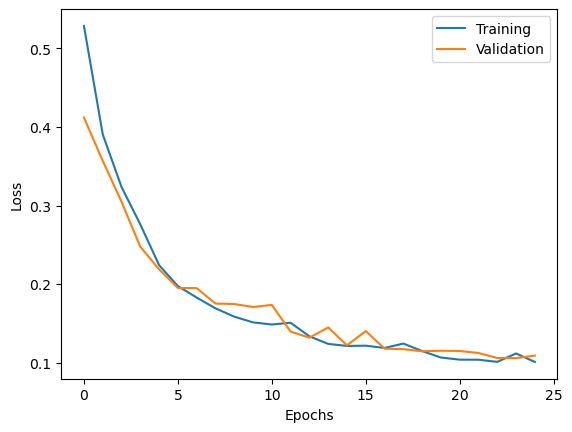

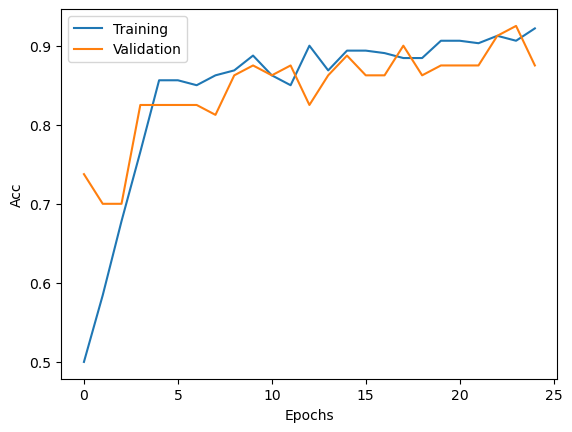

4/4 [==============================] - 0s 11ms/step - loss: 0.0758 - accuracy: 0.9307
Test Accuracy: 0.9306930899620056


In [44]:
# Normalize feature wavelengths (replace with your normalization method)
from sklearn.preprocessing import StandardScaler
# from tensorflow import keras 

X_train, X_test, y_train, y_test = train_test_split(feat, labels_one, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(512, 1))),
model.add(MaxPooling1D(pool_size=2)),
model.add(Flatten()),
model.add(Dense(16, activation='relu')),
model.add(Dense(4, activation='sigmoid')) # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))

plot_history(history)
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
